In [17]:
import os
from tensorflow.keras.layers import Input,Lambda, Dense, Flatten
from tensorflow.keras.models import Model,Sequential, load_model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import glob as glob
import matplotlib.pyplot as plt

In [2]:
img_size = [224,224]
train_path = '../input/chest-xray-pneumonia/chest_xray/train'
test_path = '../input/chest-xray-pneumonia/chest_xray/test'
val_path = '../input/chest-xray-pneumonia/chest_xray/val'

In [3]:
vgg = VGG16(input_shape=img_size + [3], weights='imagenet', include_top = False)

58892288/58889256 [==============================] - 1s 0us/step


In [4]:
for layer in vgg.layers:
    layer.trainable = False

In [5]:
folders = glob.glob(train_path+'/*')

In [6]:
X = Flatten()(vgg.output)

In [7]:
pred = Dense(len(folders), activation = 'softmax')(X)

In [8]:
model = Model(inputs = vgg.input,outputs = pred)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range= 0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
training_set = train_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/train',
                                                target_size = (224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 5216 images belonging to 2 classes.


In [13]:
test_set = train_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/test',
                                                target_size = (224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 624 images belonging to 2 classes.


In [15]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs = 1,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

163/163 [==============================] - 638s 4s/step - loss: 0.1103 - accuracy: 0.9576 - val_loss: 0.4611 - val_accuracy: 0.8510


In [67]:
val_img = image.load_img('../input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg',target_size = (224,224))

In [68]:
print(val_img)

<PIL.Image.Image image mode=RGB size=224x224 at 0x7F0B9EA9F750>


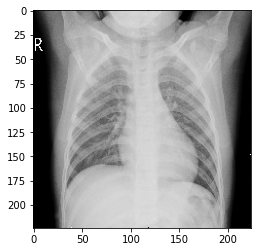

In [69]:
plt.imshow(val_img)

In [70]:
val_img = image.img_to_array(val_img)
val_img = np.expand_dims(val_img,axis = 0)

In [76]:
img_preprocess = preprocess_input(val_img)

In [77]:
prediction = model.predict(img_preprocess)

In [78]:
model.predict(img_preprocess)

array([[1., 0.]], dtype=float32)

In [79]:
print(prediction)

[[1. 0.]]
